In [191]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [192]:
start = '2017-01-01'
end = '2021-10-01'

In [193]:
data = yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK', start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [194]:
df = data['Adj Close']

In [195]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.146656,29.128023,74.474815,48.913532
2017-01-05,53.759998,28.555840,29.664595,74.096779,49.104603
2017-01-06,53.990002,28.555840,29.817904,74.474815,48.913532
2017-01-09,51.959999,28.555840,29.357979,73.907753,48.340328
...,...,...,...,...,...
2021-09-24,73.980003,NaN,NaN,NaN,NaN
2021-09-27,75.449997,75.753326,37.146828,111.294357,58.820953
2021-09-28,75.290001,75.015472,37.146828,113.196823,60.726082


In [196]:
df = df.fillna(method='ffill').pct_change().dropna()

In [197]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006897,0.013055,-0.017903,0.003953
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [198]:
(df == 0).sum()

CL=F         44
GPSC.BK     224
PTT.BK      270
PTTEP.BK    205
PTTGC.BK    193
dtype: int64

In [199]:
df[(df.iloc[:,1:] == 0).all(1)]

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-13,-0.012073,0.0,0.0,0.0,0.0
2017-02-13,-0.017267,0.0,0.0,0.0,0.0
2017-04-06,0.010753,0.0,0.0,0.0,0.0
2017-04-13,0.001318,0.0,0.0,0.0,0.0
2017-05-01,-0.009933,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-06-03,-0.000291,0.0,0.0,0.0,0.0
2021-07-26,-0.002220,0.0,0.0,0.0,0.0
2021-07-28,0.010328,0.0,0.0,0.0,0.0


In [200]:
df = df[~(df.iloc[:,1:] == 0).all(1)]

In [201]:
df[(df.iloc[:,1:] == 0).all(1)]

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,


In [202]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006897,0.013055,-0.017903,0.003953
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2021-09-23,0.014814,0.000000,0.012658,0.004444,0.008333
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [203]:
df = df[['CL=F', 'GPSC.BK', 'PTTEP.BK', 'PTTGC.BK', 'PTT.BK']]

<AxesSubplot:xlabel='Date'>

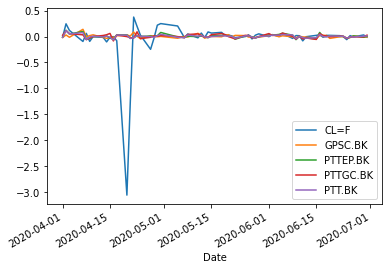

In [204]:
df.loc['2020-04' : '2020-06'].plot()

In [205]:
start_remove = pd.to_datetime('2020-04-10')
end_remove = pd.to_datetime('2020-05-10')

df = df.loc[(df.index < start_remove) | (df.index > end_remove)]
df

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906,0.018421
2017-01-06,0.004278,0.000000,0.005102,-0.003891,0.005168
2017-01-09,-0.037600,0.000000,-0.007614,-0.011719,-0.015424
2017-01-10,-0.021940,0.006897,-0.017903,0.003953,0.013055
2017-01-11,0.028139,0.006849,0.005208,-0.003937,-0.007732
...,...,...,...,...,...
2021-09-23,0.014814,0.000000,0.004444,0.008333,0.012658
2021-09-27,0.019870,-0.012821,0.035398,0.020661,0.012500
2021-09-28,-0.002121,-0.009740,0.017094,0.032389,0.000000


<AxesSubplot:xlabel='Date'>

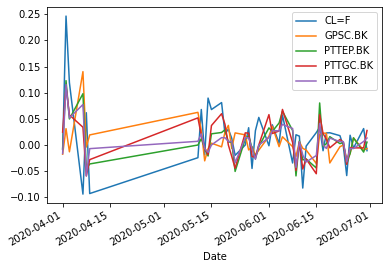

In [206]:
df.loc['2020-04' : '2020-06'].plot()

In [207]:
X = df.iloc[:1000, :-1]
y = df.iloc[:1000, -1]

In [208]:
Lower_limit = df.quantile(0.01)
Upper_limit = df.quantile(0.99)

In [209]:
df = df[~((df < Lower_limit) | (df > Upper_limit)).any(1)]

In [210]:
df.describe()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,0.000602,0.000754,0.000818,0.000520,0.000266
std,0.018847,0.019330,0.015471,0.016490,0.013227
min,-0.075059,-0.059761,-0.053498,-0.049383,-0.040000
25%,-0.009070,-0.009804,-0.008380,-0.009479,-0.006623
50%,0.001520,0.000000,0.000000,0.000000,0.000000
75%,0.011968,0.010791,0.008696,0.010101,0.006757
max,0.059211,0.069697,0.064394,0.058140,0.052044


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
from sklearn import metrics

from sklearn.model_selection import cross_val_score

In [212]:
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=10)
scores

array([0.29792768, 0.47547774, 0.2354021 , 0.5535156 , 0.65935141,
       0.3648614 , 0.62614853, 0.8716249 , 0.62354194, 0.61576548])

In [213]:
df.corr()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
CL=F,1.000000,0.003024,0.163624,0.113931,0.155960
GPSC.BK,0.003024,1.000000,0.161464,0.211641,0.221076
PTTEP.BK,0.163624,0.161464,1.000000,0.465221,0.628386
PTTGC.BK,0.113931,0.211641,0.465221,1.000000,0.545941
PTT.BK,0.155960,0.221076,0.628386,0.545941,1.000000


In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
scores

array([0.37889294, 0.62170249, 0.64967686, 0.71570727, 0.53721949,
       0.71980753, 0.47815272, 0.86970707, 0.75845482, 0.50679834])

In [215]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [216]:
y_pred = model.predict(X_test)

In [217]:
reg.score(X_test, y_test)

0.562930233345402

In [218]:
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE =  0.008854265747877317
MSE =  0.00014502708708019613
RMSE =  0.012042719256056588


In [219]:
reg.coef_

array([0.01563503, 0.03658388, 0.47237229, 0.27246226])

In [220]:
live_data = reg.predict(df.iloc[1000:,:-1])

In [221]:
live_data

array([-1.10531106e-02,  6.76802658e-03,  2.89847594e-03,  6.19199081e-03,
        9.26180010e-03, -1.79766976e-02, -2.03898774e-02, -4.72298016e-03,
       -1.46358359e-02, -3.28784186e-03,  1.12917556e-02, -1.48304850e-02,
       -1.46206131e-02,  1.01117468e-02,  4.74825483e-03, -7.23609826e-03,
       -4.36551910e-03,  5.04323073e-03, -2.45742433e-02,  1.73233891e-02,
        2.26155321e-03,  2.13055837e-03, -1.22075942e-02, -5.80825459e-04,
        6.18162530e-03,  1.37130962e-02, -5.61201554e-03,  7.36948827e-04,
        8.95222681e-03, -3.49223909e-03, -5.08659713e-04, -1.63314878e-02,
       -1.74406965e-02,  2.67006277e-02,  2.56447122e-02,  5.41016773e-03,
       -1.54778439e-04,  6.87684793e-03,  2.93246142e-02, -6.05742789e-03,
       -1.41549503e-02,  5.79214817e-03,  1.33807432e-05, -1.33578800e-02,
       -6.61972261e-03, -5.13143787e-03,  6.77166537e-04,  1.18090861e-03,
        9.03601581e-03,  2.06443037e-02, -2.82290535e-03,  4.53644383e-03,
       -1.42798424e-03, -

In [222]:
test = df.iloc[1000:]

In [223]:
test['Pred'] = live_data

C:\Users\gunsr\AppData\Local\Temp\ipykernel_11080\2832366921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = live_data


In [224]:
test

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-06-30,0.006714,0.006897,-0.016807,-0.012552,-0.006329,-0.011053
2021-07-01,0.023955,0.034247,0.008547,0.004237,-0.006370,0.006768
2021-07-02,-0.000930,-0.013245,0.000000,0.012658,-0.006410,0.002898
2021-07-05,0.000000,0.030201,0.008475,0.004167,0.006452,0.006192
2021-07-06,-0.023816,-0.006515,0.021008,0.000000,0.000000,0.009262
...,...,...,...,...,...,...
2021-09-23,0.014814,0.000000,0.004444,0.008333,0.012658,0.004550
2021-09-27,0.019870,-0.012821,0.035398,0.020661,0.012500,0.022141
2021-09-28,-0.002121,-0.009740,0.017094,0.032389,0.000000,0.016459


<AxesSubplot:xlabel='Date'>

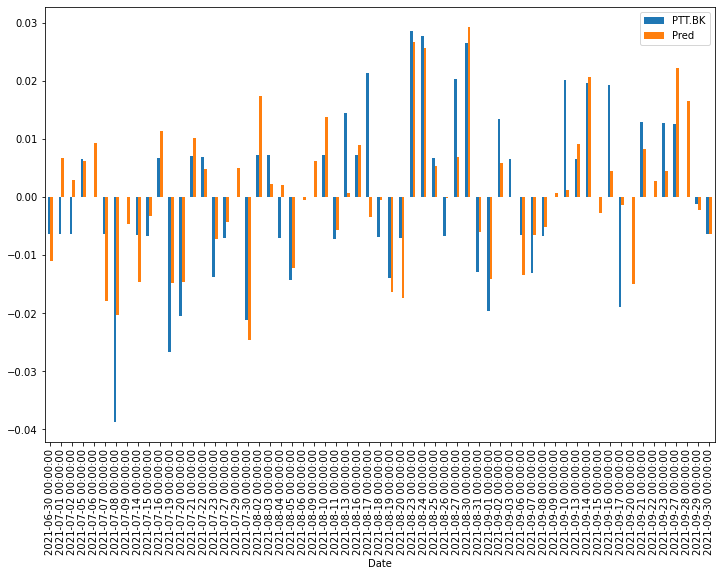

In [225]:
test.iloc[:,-2:].plot(kind='bar', figsize=(12,8))

In [226]:
(test+1)

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-06-30,1.006714,1.006897,0.983193,0.987448,0.993671,0.988947
2021-07-01,1.023955,1.034247,1.008547,1.004237,0.993630,1.006768
2021-07-02,0.999070,0.986755,1.000000,1.012658,0.993590,1.002898
2021-07-05,1.000000,1.030201,1.008475,1.004167,1.006452,1.006192
2021-07-06,0.976184,0.993485,1.021008,1.000000,1.000000,1.009262
...,...,...,...,...,...,...
2021-09-23,1.014814,1.000000,1.004444,1.008333,1.012658,1.004550
2021-09-27,1.019870,0.987179,1.035398,1.020661,1.012500,1.022141
2021-09-28,0.997879,0.990260,1.017094,1.032389,1.000000,1.016459


In [227]:
(test+1).cumprod(0)

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-06-30,1.006714,1.006897,0.983193,0.987448,0.993671,0.988947
2021-07-01,1.030830,1.041379,0.991597,0.991632,0.987342,0.995640
2021-07-02,1.029871,1.027586,0.991597,1.004184,0.981013,0.998526
2021-07-05,1.029871,1.058621,1.000000,1.008368,0.987342,1.004709
2021-07-06,1.005344,1.051724,1.021008,1.008368,0.987342,1.014014
...,...,...,...,...,...,...
2021-09-23,0.989480,1.064381,0.959265,1.054494,0.999245,0.996556
2021-09-27,1.009141,1.050735,0.993221,1.076281,1.011736,1.018621
2021-09-28,1.007001,1.040501,1.010199,1.111140,1.011736,1.035386


<AxesSubplot:xlabel='Date'>

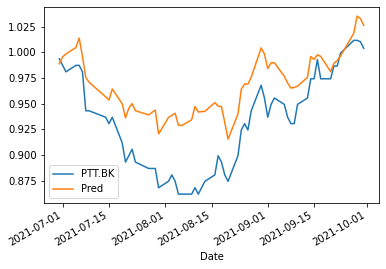

In [228]:
(test+1).iloc[:,-2:].cumprod().plot()